In [1]:
from src.datasets import load_celeba
from src.trainer import Trainer

In [2]:
import torch
import numpy as np

In [3]:
X_train_sampler, X_test_sampler, Y_train_sampler, Y_test_sampler = load_celeba(
    img_size=64,
    batch_size=64
)

Files already downloaded and verified


In [4]:
torch.manual_seed(0xBADBEEF); np.random.seed(0xBADBEEF)
X_fixed = X_train_sampler.sample(10)[:,None].repeat(1,4,1,1,1)
with torch.no_grad():
    Z_fixed = torch.randn(10, 4, 1, 64, 64, device='cuda') * 0.1
    XZ_fixed = torch.cat([X_fixed, Z_fixed], dim=2)
del X_fixed, Z_fixed
Y_fixed = Y_train_sampler.sample(10)

X_test_fixed = X_test_sampler.sample(10)[:,None].repeat(1,4,1,1,1)
with torch.no_grad():
    Z_test_fixed = torch.randn(10, 4, 1, 64, 64, device='cuda') * 0.1
    XZ_test_fixed = torch.cat([X_test_fixed, Z_test_fixed], dim=2)
del X_test_fixed, Z_test_fixed
Y_test_fixed = Y_test_sampler.sample(10)

In [5]:
from src.plotters import plot_Z_images, plot_random_Z_images
from src.unet import UNet

2023-02-02 10:47:26.738095: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-02 10:47:26.867563: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-02 10:47:28.551494: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.6/lib64
2023-02-02 10:47:28.551634: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [6]:
T = UNet(
    n_channels_in=4,
    n_channels_out=3
).to("cuda")

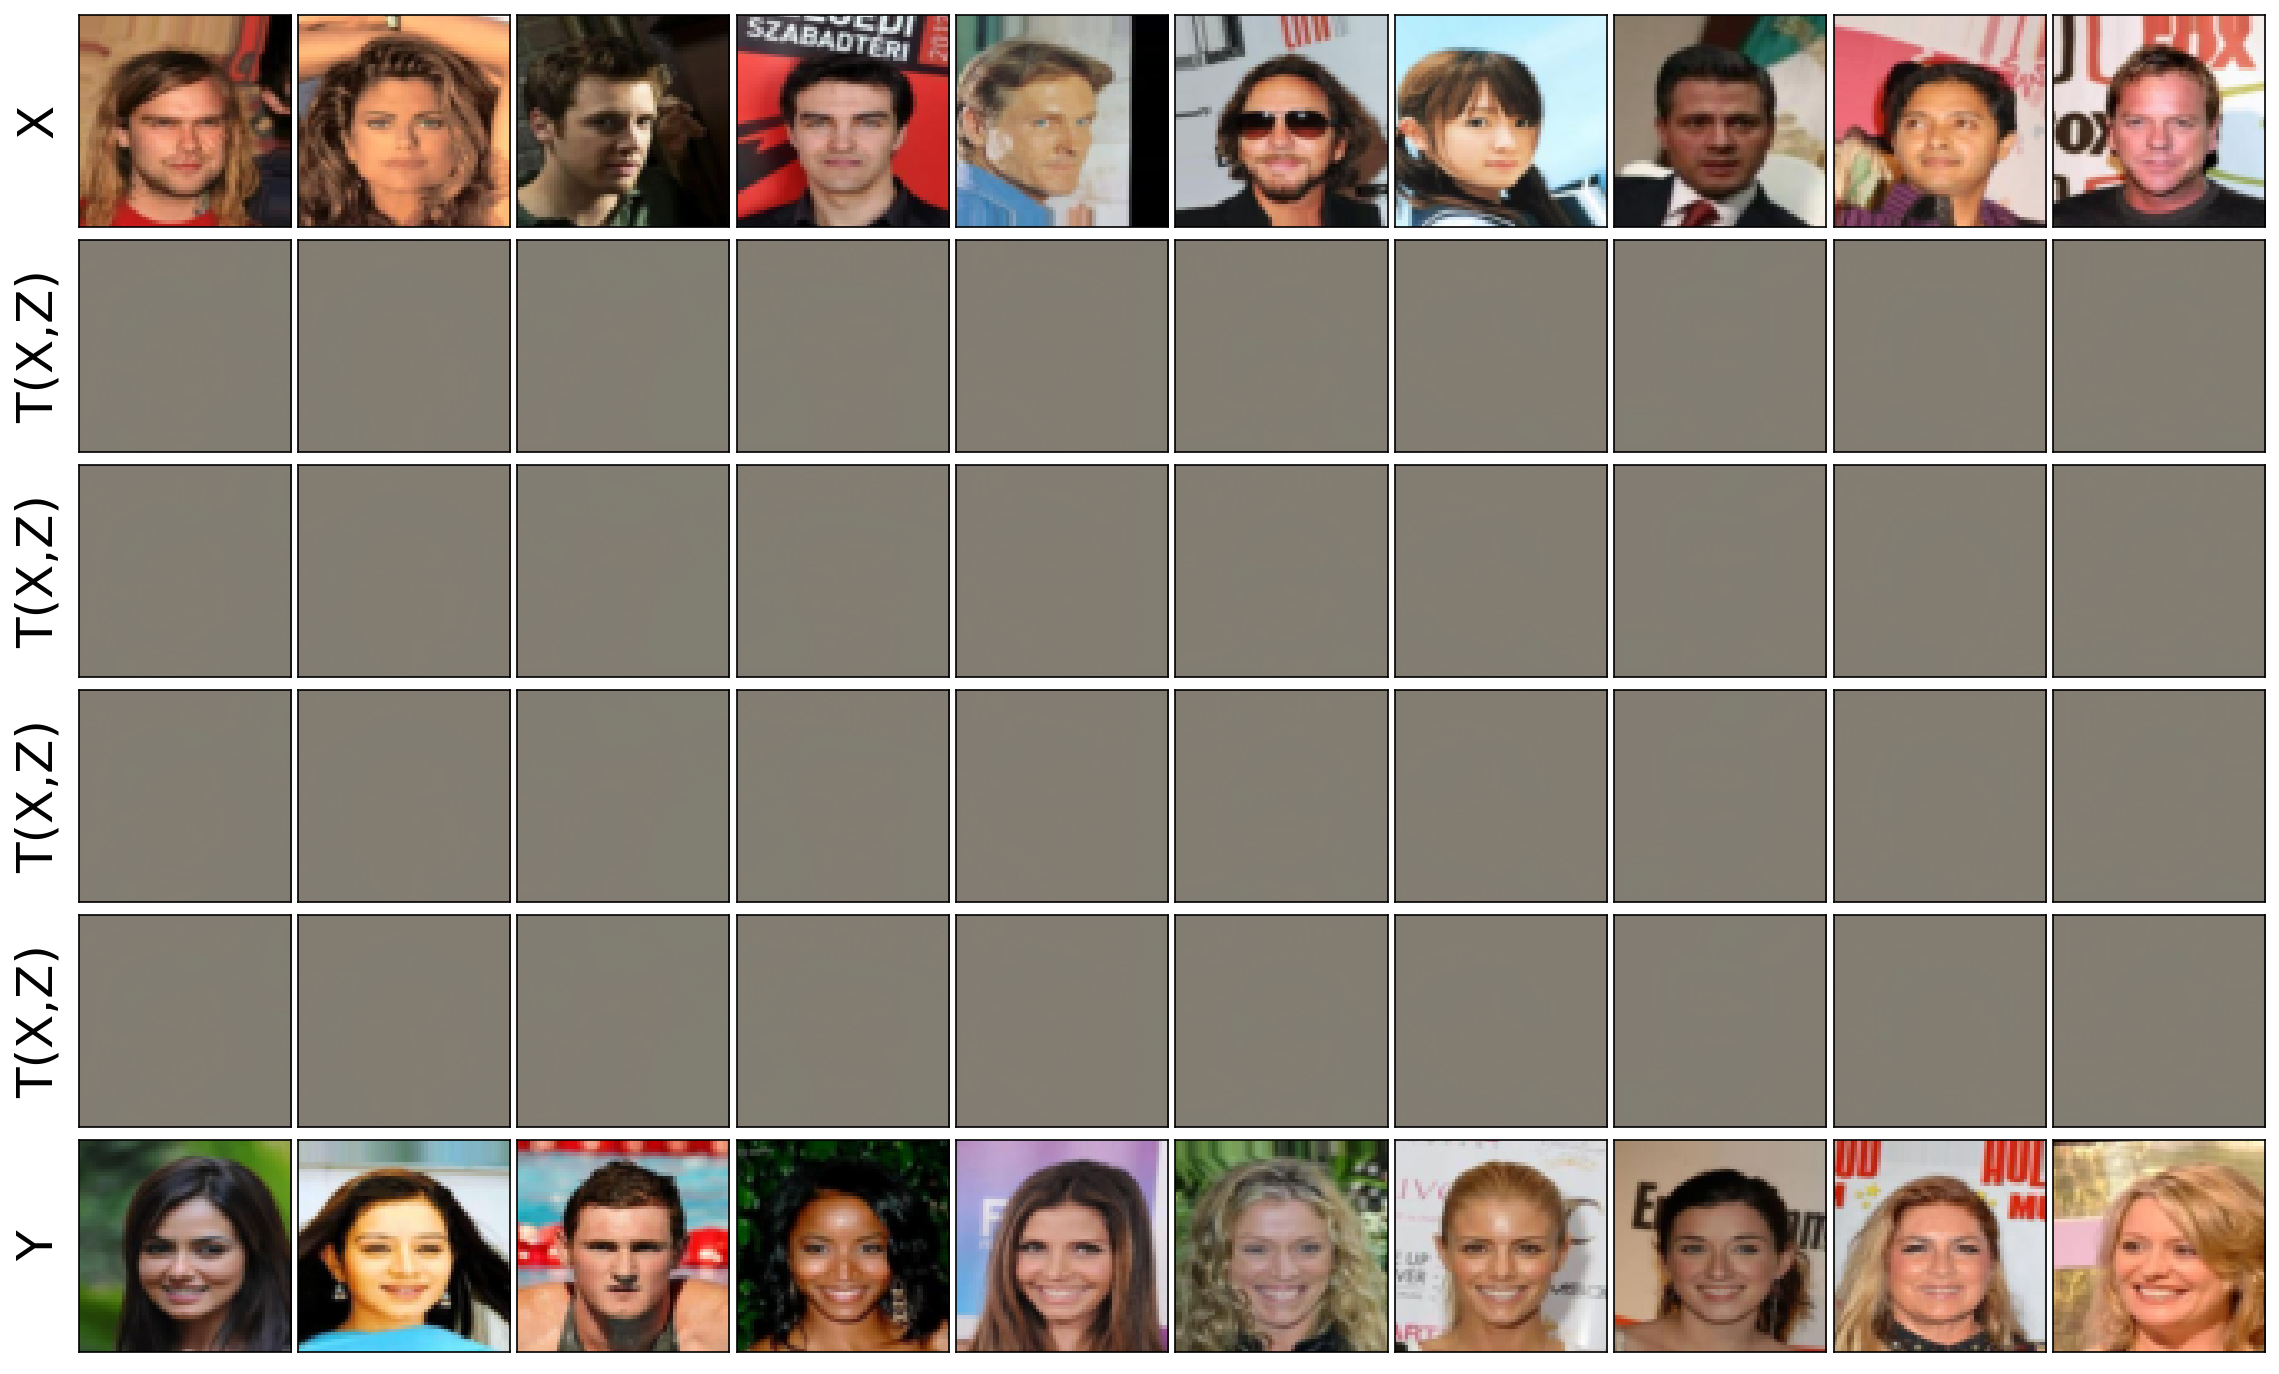

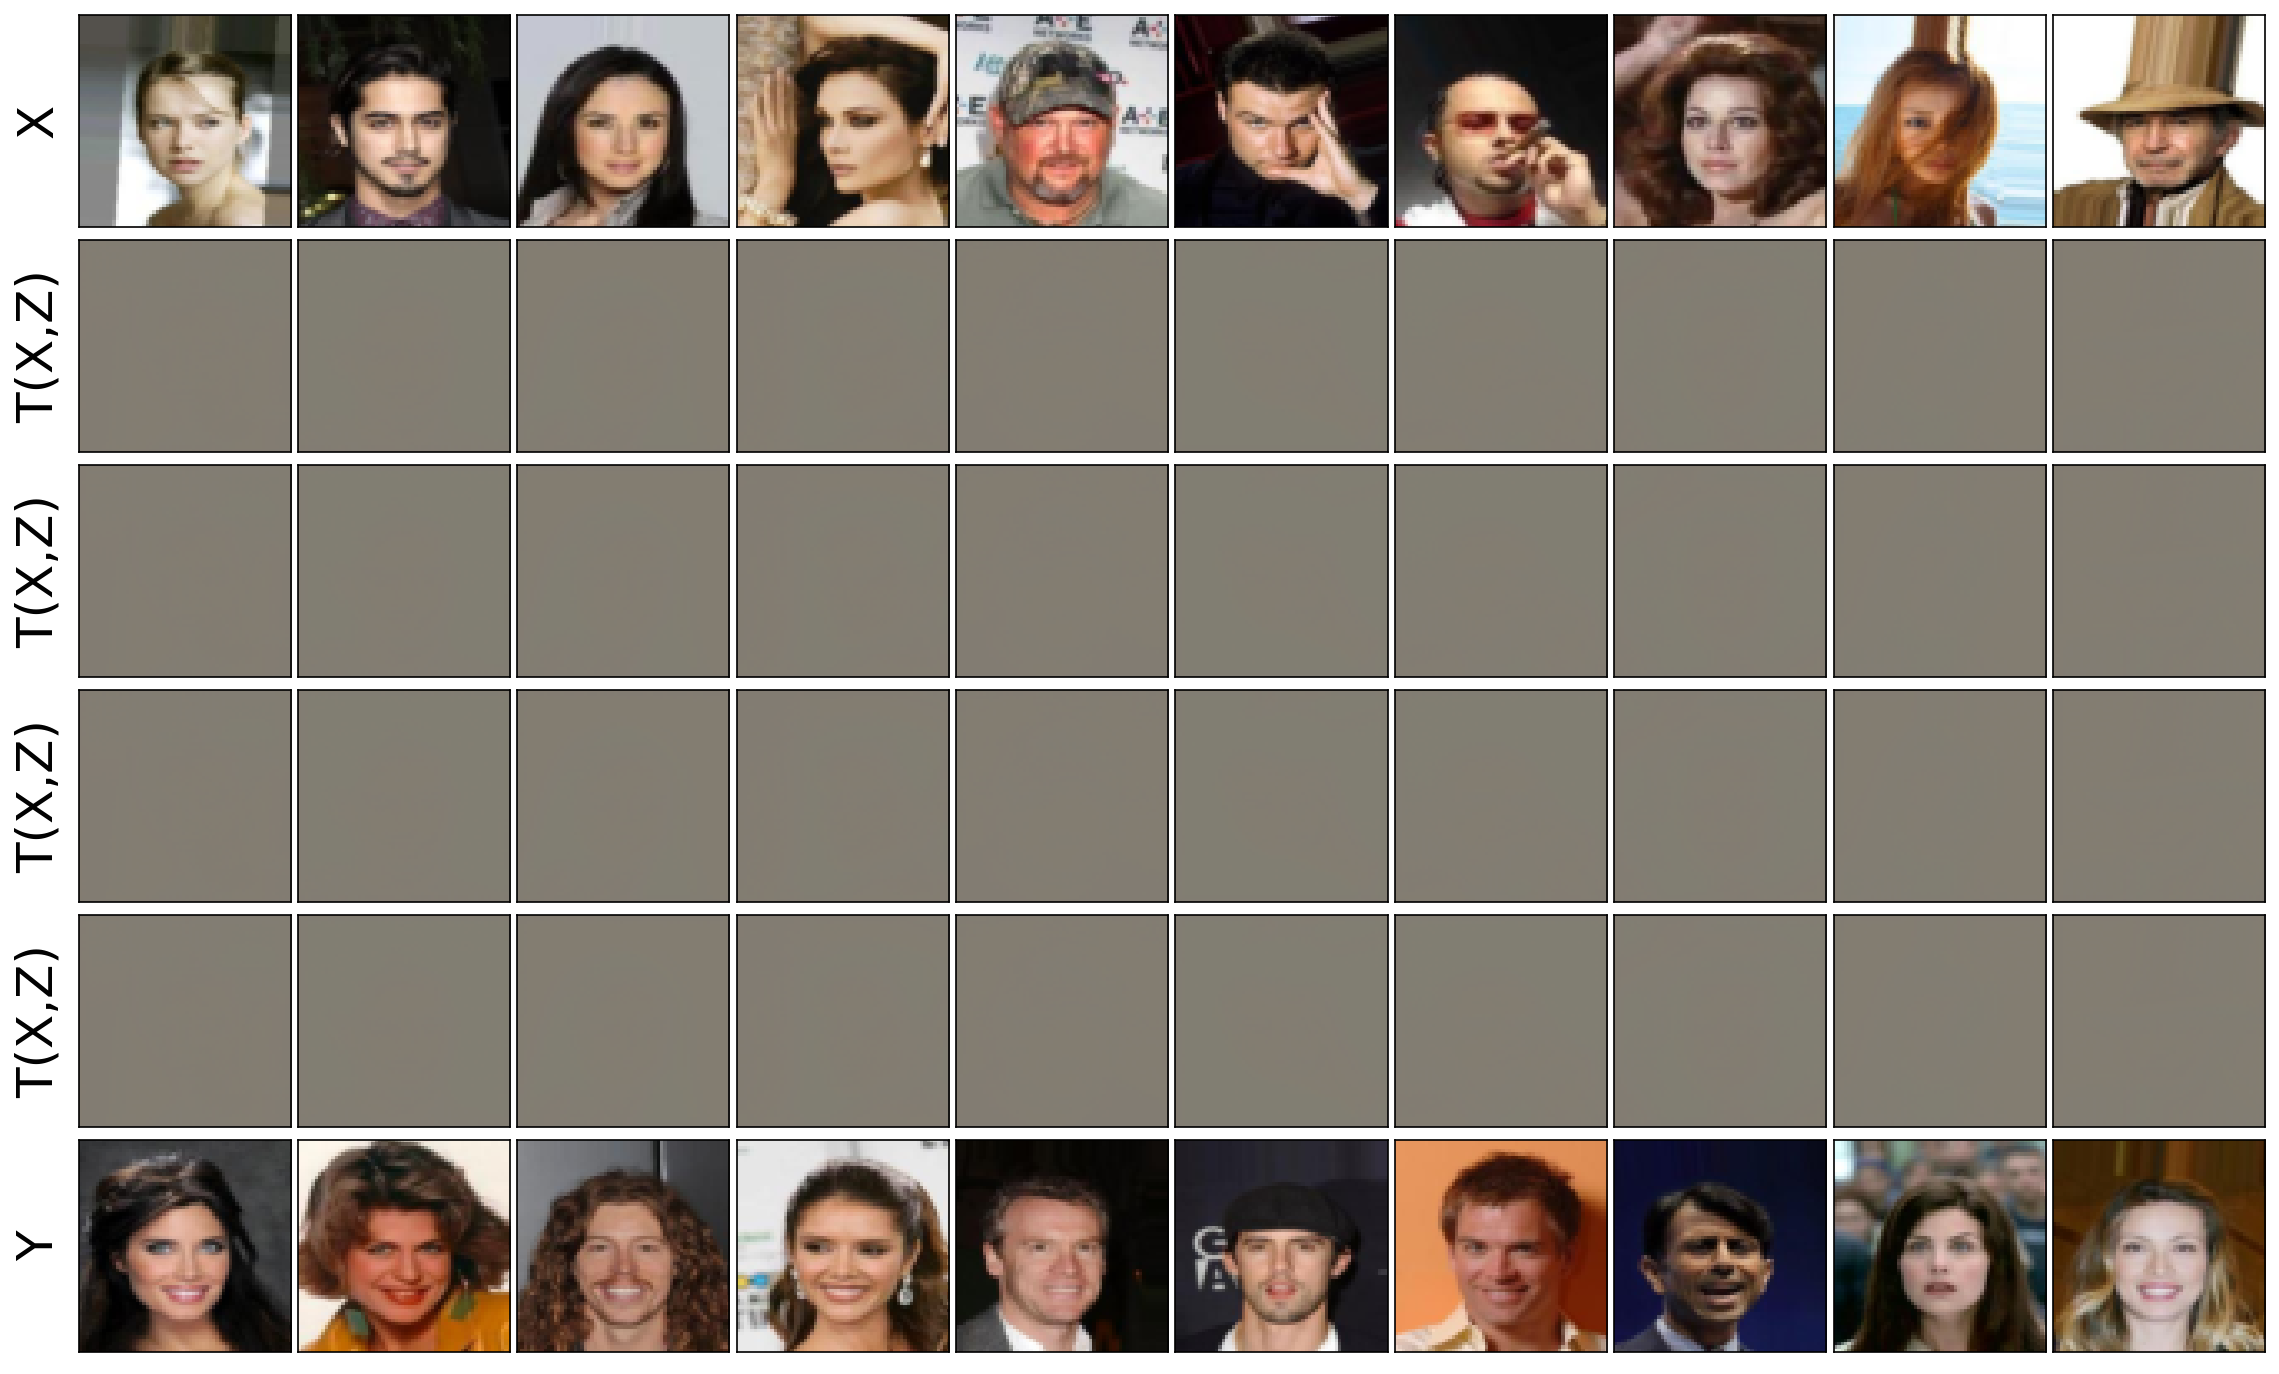

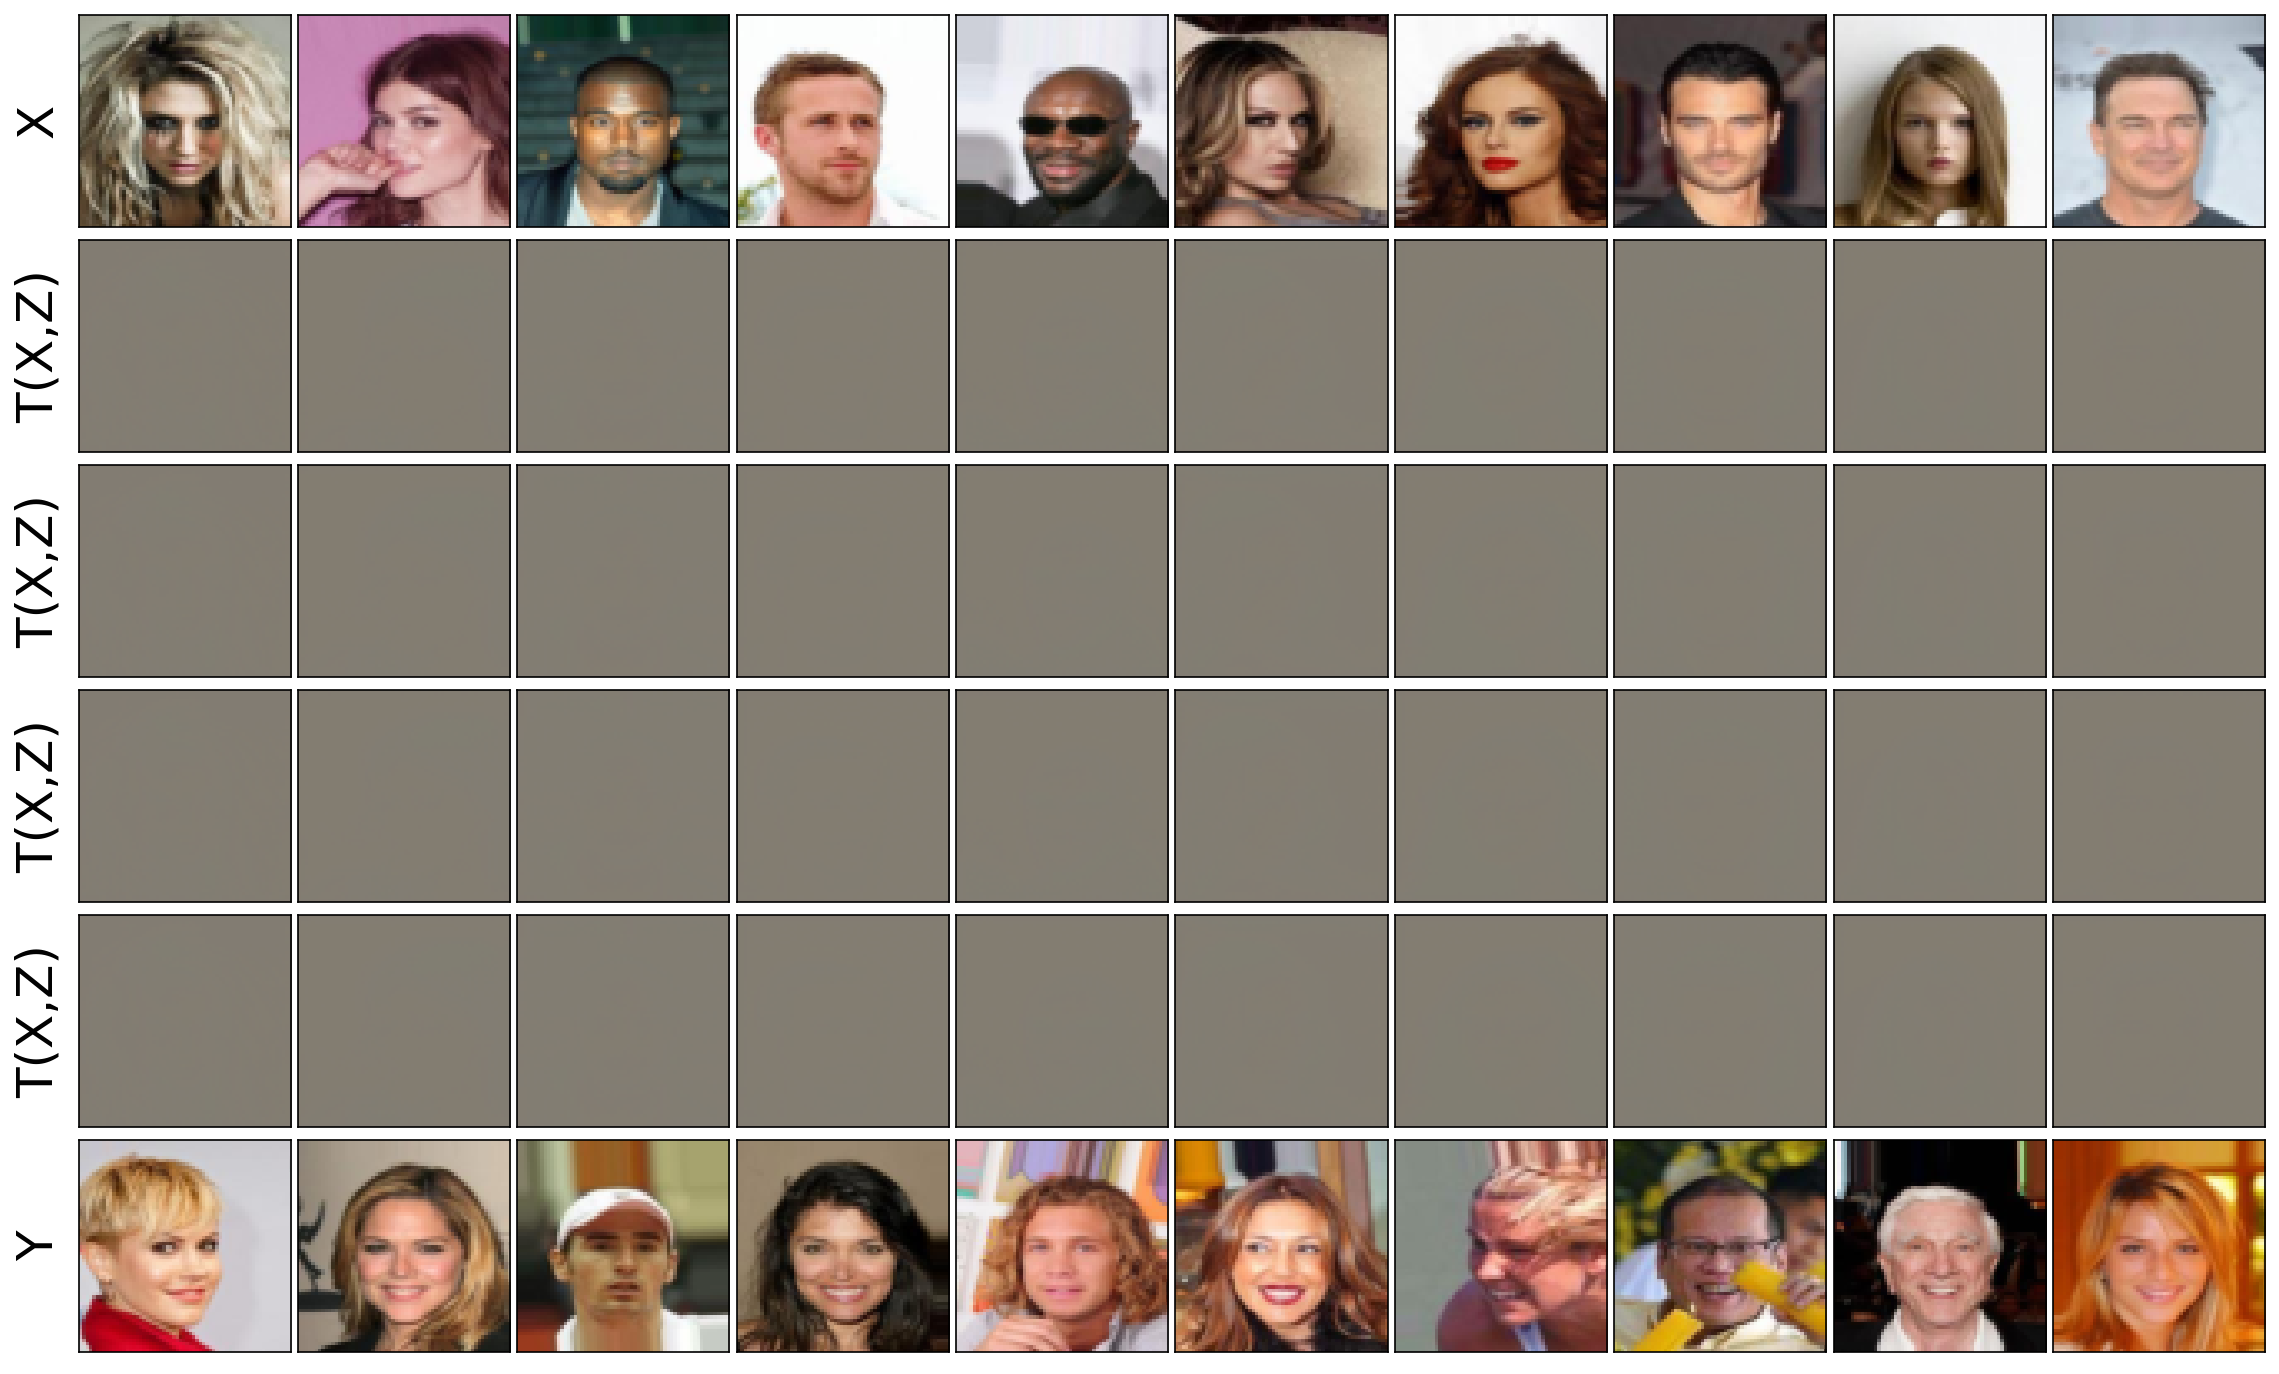

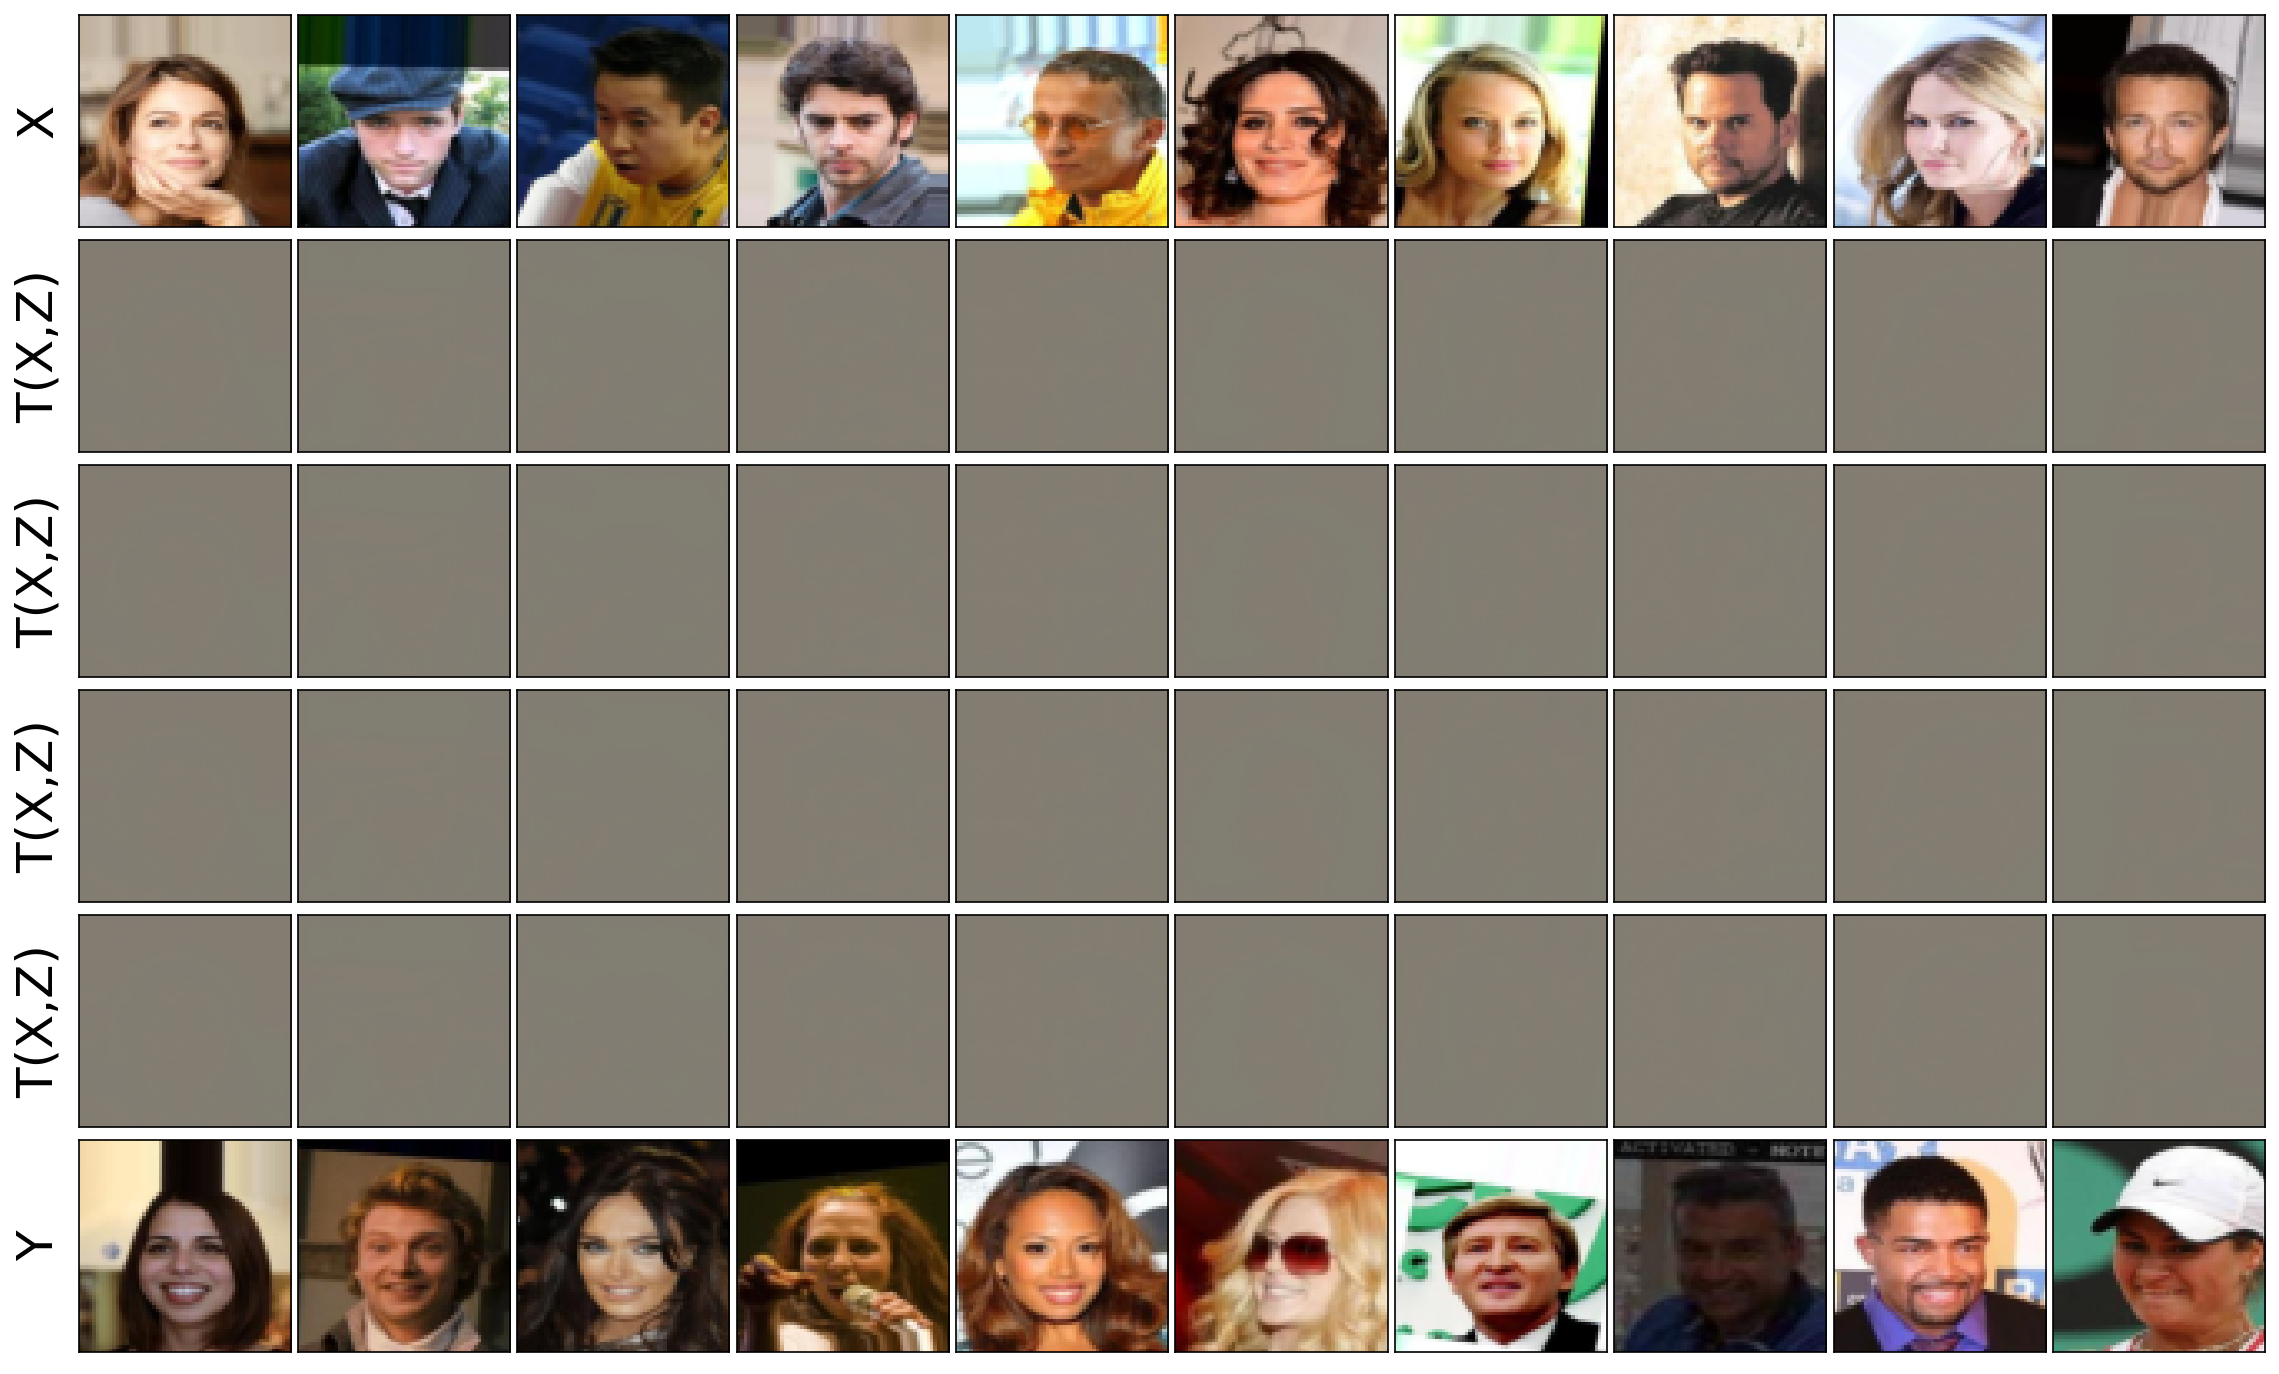

In [7]:
fig, axes = plot_Z_images(XZ_fixed, Y_fixed, T, None)
fig, axes = plot_random_Z_images(X_train_sampler, 1, 0.1, Y_train_sampler, T, None)
fig, axes = plot_Z_images(XZ_test_fixed, Y_test_fixed, T, None)
fig, axes = plot_random_Z_images(X_test_sampler, 1, 0.1, Y_test_sampler, T, path="runs/test.png")

In [12]:
from torch.utils.tensorboard import SummaryWriter

In [13]:
writer = SummaryWriter()

In [14]:
writer.add_figure("test", fig)

In [11]:
from PIL import Image

In [12]:
from src.tools import fig2img

In [13]:
img = fig2img(fig)

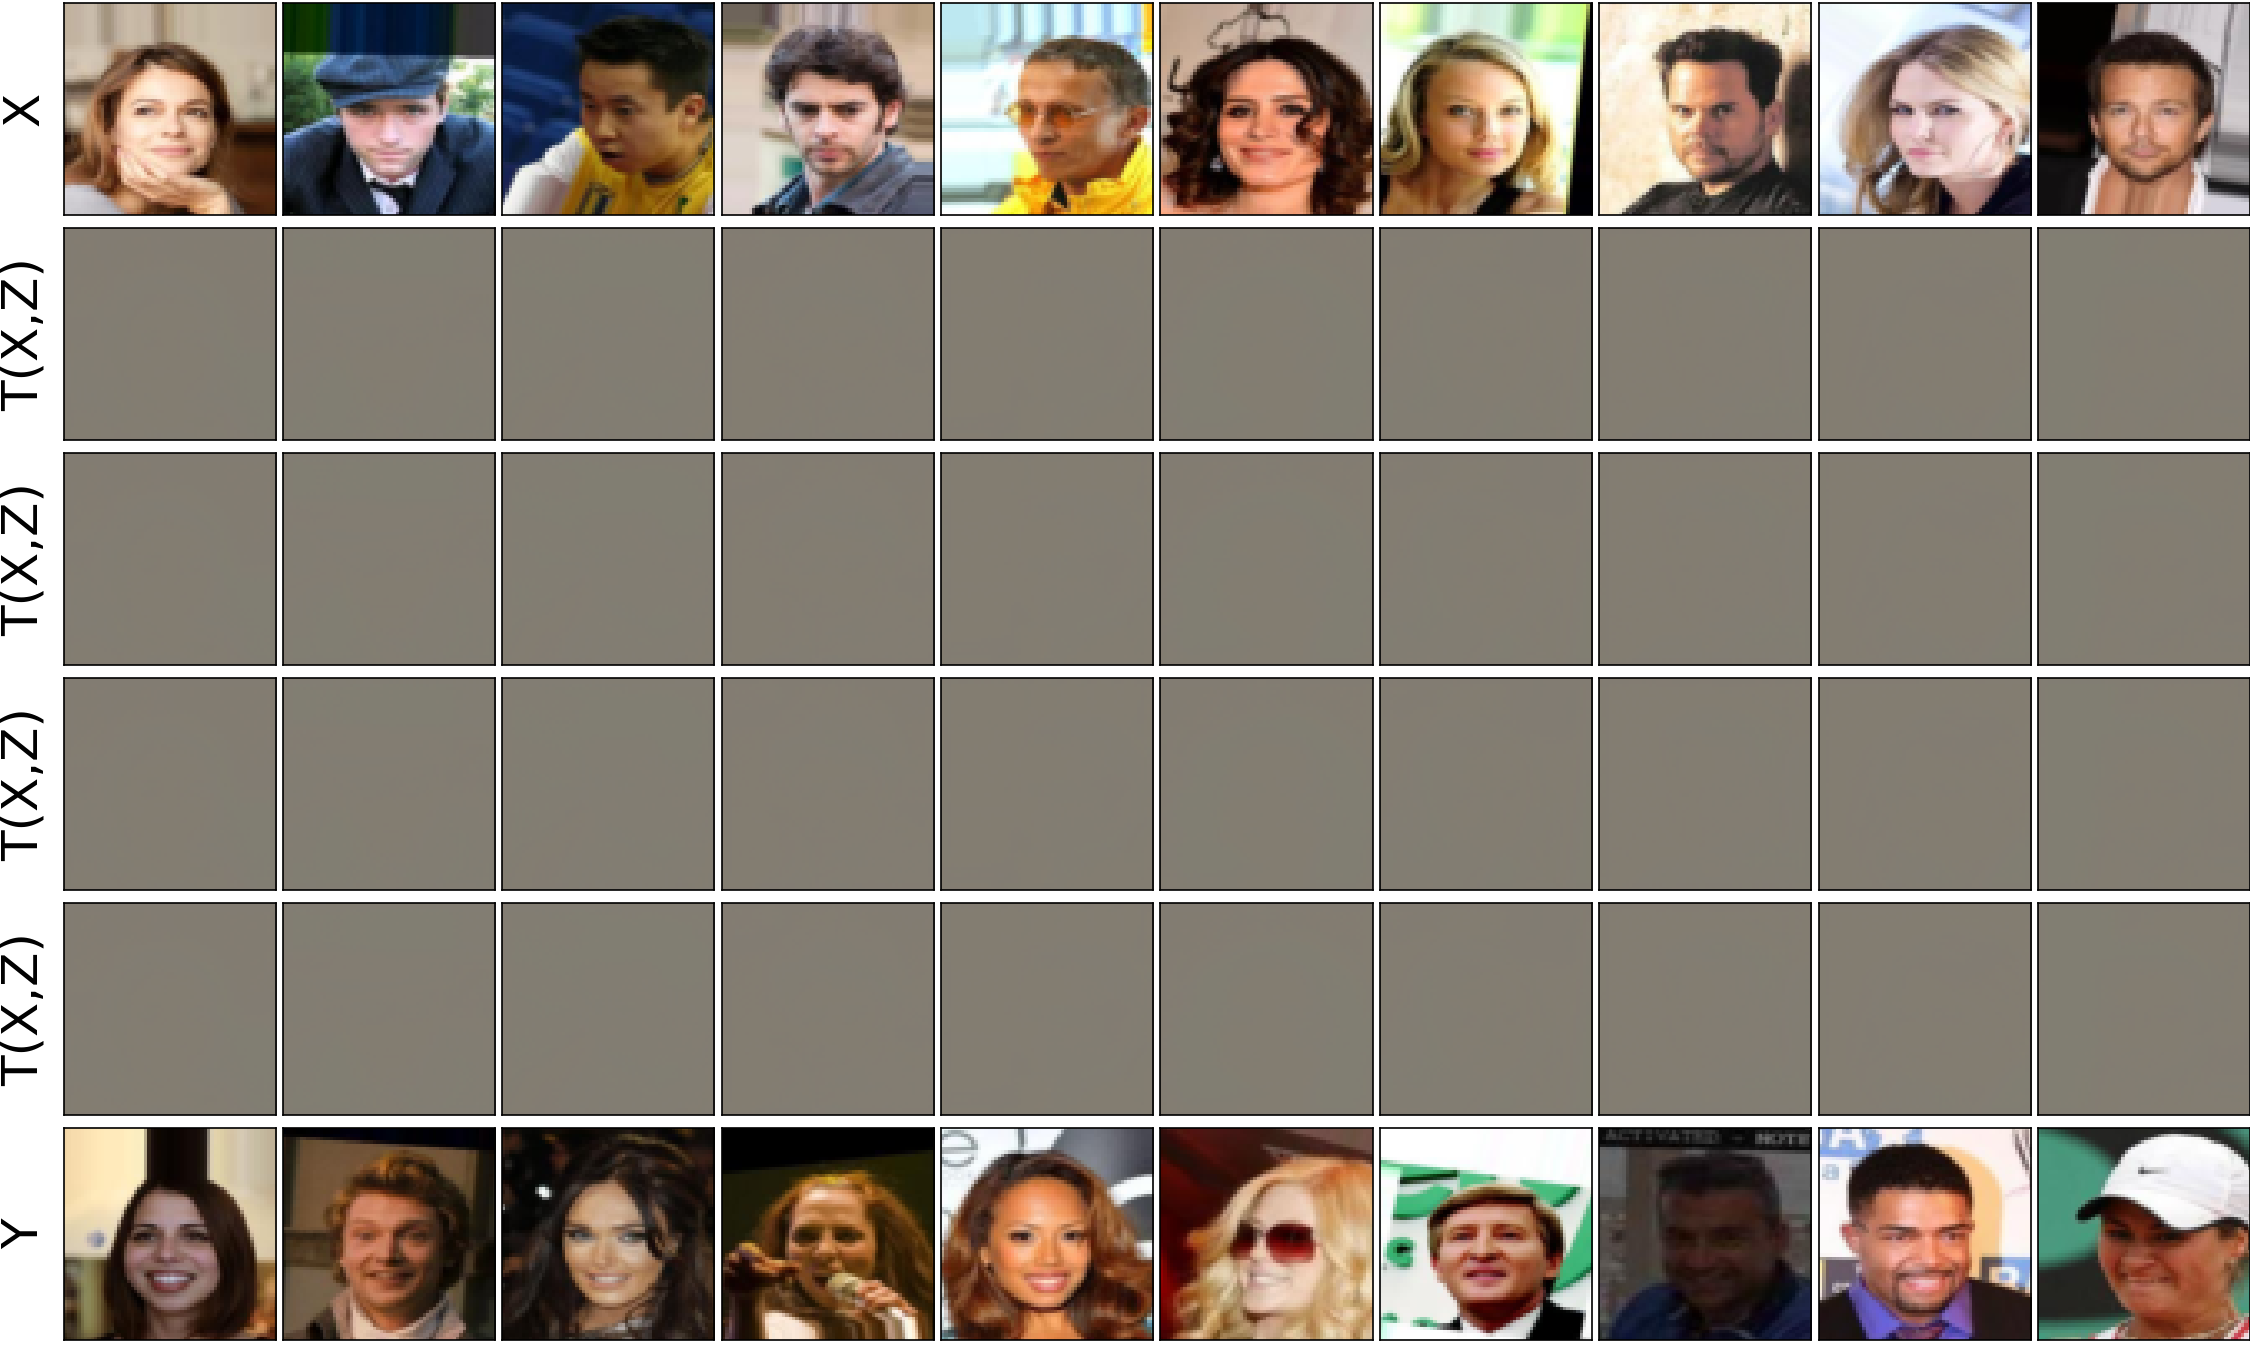

In [14]:
img

In [4]:
trainer = Trainer(
    img_size=64,
    batch_size=8,
    zc=1,
    z_std=0.1,
    z_size=8,
    T_iters=10,
    D_lr=1e-4,
    T_lr=1e-4,
    gamma_0=0,
    gamma_1=2/3,
    gamma_iters=25000,
    ckpt_interval=1,
    max_steps=10
)

In [5]:
trainer.train(
    X_train_sampler,
    X_test_sampler,
    Y_train_sampler,
    Y_test_sampler
)

  0%|          | 0/10 [00:00<?, ?it/s]

0


 10%|█         | 1/10 [00:03<00:30,  3.33s/it]

1


 20%|██        | 2/10 [00:11<00:47,  5.93s/it]

2


 20%|██        | 2/10 [00:18<01:14,  9.35s/it]


KeyboardInterrupt: 

In [4]:
trainer = Trainer(
    img_size=64,
    batch_size=8,
    zc=1,
    z_std=0.1,
    z_size=8,
    T_iters=10,
    D_lr=1e-4,
    T_lr=1e-4,
    gamma_0=0,
    gamma_1=2/3,
    gamma_iters=25000,
    ckpt_path="runs/ckpt.pt",
    ckpt_interval=1,
    max_steps=10
)

In [5]:
trainer.train(
    X_train_sampler,
    X_test_sampler,
    Y_train_sampler,
    Y_test_sampler
)

  0%|          | 0/8 [00:00<?, ?it/s]

2


 12%|█▎        | 1/8 [00:08<01:00,  8.63s/it]

3


 25%|██▌       | 2/8 [00:13<00:40,  6.70s/it]

4


 25%|██▌       | 2/8 [00:19<00:58,  9.69s/it]


KeyboardInterrupt: 

In [1]:
import torchvision

In [2]:
celeba = torchvision.datasets.CelebA(root="datasets", split="all", target_type="attr", download=True)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [3]:
from mnistm import create_mnistm

In [4]:
create_mnistm()

Creating MNIST-M... That may takes a minute
Loading BSR training images


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Building train set...
Processing example 0


/home/khiemlk17/Documents/M2 DAC/neural_optimal_transport-Supplementary Material/mnistm.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bg_img = rand.choice(background_data)


Processing example 10000
Processing example 20000
Processing example 30000
Processing example 40000
Processing example 50000
Building test set...
Processing example 0
Done!


In [6]:
import torch

In [7]:
mnist_pixels = torchvision.datasets.MNIST('.', train=True, download=True).data / 255
mean = mnist_pixels.mean().item()
std = mnist_pixels.std().item()

print(f"Mean {mean} and Std {std}")
mean = torch.tensor([mean, mean, mean])
std = torch.tensor([std, std, std])

Mean 0.13066047430038452 and Std 0.30810782313346863


In [8]:
from torchvision import transforms

In [9]:
from torch.utils.data import DataLoader

In [10]:
transform = transforms.Compose([
  transforms.ToTensor(),
  lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x,
  transforms.Normalize(mean, std)
])

mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform)
mnist_test = torchvision.datasets.MNIST('.', train=False, transform=transform)

source_train_loader = DataLoader(mnist_train, batch_size=128)
source_test_loader = DataLoader(mnist_test, batch_size=128)

In [11]:
import pickle

In [12]:
with open('mnistm_data.pkl', 'rb') as f:
  mnist_m = pickle.load(f)

class MNISTM(torch.utils.data.Dataset):
  def __init__(self, x, y, transform):
    self.x, self.y = x, y
    self.transform = transform

  def __len__(self):
    return len(self.x)

  def __getitem__(self, index):
    x, y = self.x[index], self.y[index]
    x = self.transform(x)

    return x, y

mnistm_train = MNISTM(mnist_m["x_train"], mnist_m["y_train"], transform)
mnistm_test = MNISTM(mnist_m["x_test"], mnist_m["y_test"], transform)

target_train_loader = DataLoader(mnistm_train, batch_size=128)
target_test_loader = DataLoader(mnistm_test, batch_size=128)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

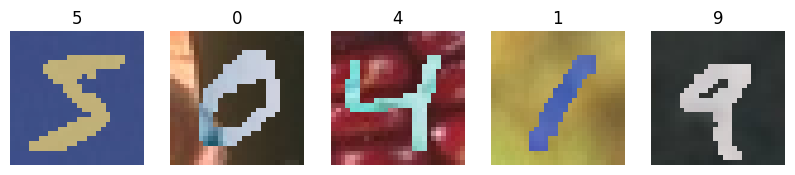

In [16]:
plt.figure(figsize=(10, 7))

for i in range(5):
  ax = plt.subplot(1, 5, i + 1)
  ax.axis('off')

  x, y = mnistm_train[i]
  img = ((x * std[:, None, None] + mean[:, None, None]) * 255).permute(1, 2, 0)
  plt.imshow(img.numpy().astype(np.uint8))
  plt.title(y)